In [1]:
"""
Organizing good plots for syntax, fo|cusing on activity before trial onset.
- euclidian dist
- state space

See structured representation like in Yue model?

"""

'\nOrganizing good plots for syntax, fo|cusing on activity before trial onset.\n- euclidian dist\n- state space\n\nSee structured representation like in Yue model?\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralmonkey.scripts.analy_dfallpa_extract import extract_dfallpa_helper
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
import os
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories_single, euclidian_distance_compute_trajectories


# Load DFallPa dataset

In [ ]:
version = "trial"
combine = False
question = "RULE_BASE_trial"

# animal = "Diego"
# date = 230915
# # date = 230913

animal = "Pancho"
# date = 230829
date = 220908

# Load a single DFallPA
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)
# Make a copy of all PA before normalization
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


### Preprocessing

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import preprocess_dfallpa_basic_quick
preprocess_dfallpa_basic_quick(DFallpa)

### Subspace projection

In [ ]:
SAVEDIR = "/tmp"


In [ ]:
DFallpa = DFallpa[:15].reset_index(drop=True)
DFallpa

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import preprocess_dfallpa
list_subspace_projection = ["epch_sytxcncr"]
tbin_dur = "default"
tbin_slide = None

LIST_VAR_VAROTHERS = [
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_1"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch"]),
    # ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_0"]),
    # ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch", "seqc_0_shape", "seqc_0_loc"]),
    ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch"]),
    # ("FEAT_num_strokes_beh", ["epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("epoch", ["FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape"]),
]

for subspace_projection in list_subspace_projection:

    SAVEDIR_ANALYSIS = f"{SAVEDIR}/statespace_and_regression/{animal}-{date}-comb={combine}-q={question}-ssproj={subspace_projection}"            
    os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

    ### Preprocessing
    LIST_DIMS = preprocess_dfallpa(DFallpa, subspace_projection, tbin_slide, tbin_dur, SAVEDIR_ANALYSIS, HACK=False)



### State space plots

In [ ]:
LIST_VAR_VAROTHERS = [
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_1"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch"]),
    ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_0"]),
    ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch", "seqc_0_shape", "seqc_0_loc"]),
    ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch"]),
]
NPCS_KEEP = 8

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import preprocess_dfallpa

list_subspace_projection = ["epch_sytxcncr"]
tbin_dur = "default"
tbin_slide = None

for subspace_projection in list_subspace_projection:

    ### Preprocessing
    savedir = f"{SAVEDIR}/ssproj={subspace_projection}"
    os.makedirs(savedir, exist_ok=True)
    LIST_DIMS = preprocess_dfallpa(DFallpa, subspace_projection, tbin_slide, tbin_dur, savedir, HACK=False)


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_plot_scalar_wrapper

# extract new variable, the number of items for each of the chunk ranks
SAVEDIR = f"/tmp/SYNTAX_TRIAL/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)
state_space_plot_scalar_wrapper(DFallpa, SAVEDIR, LIST_VAR_VAROTHERS)

### Linear regression to find encoding axis

In [ ]:
SAVEDIR_BASE = f"/tmp/SYNTAX_REGRE/{animal}-{date}"


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import regression_fit_and_score_single, regression_wrapper
var_effect = "syntax_slot_0"
vars_others = ["FEAT_num_strokes_beh", "epoch", "seqc_0_shape", "seqc_0_loc", "syntax_slot_1"]
# vars_others = ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_1"]
# vars_others = ["FEAT_num_strokes_beh", "epoch", "syntax_slot_1"]

DFRES_ALL, DFDISTCOS_ALL, SAVEDIR = regression_wrapper(DFallpa, var_effect, vars_others, SAVEDIR_BASE, 
                                              ndims = 4, PLOT_SCATTER_PRED_VS_ACTUAL = False)


In [ ]:
### For pruning
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import regression_wrapper_prune

min_levs = 3
# min_r2_test = 0.1
min_r2_test = None
min_ntot = 15
min_nmin = 4

DFRES_ALL_PRUNED, DFDISTCOS_ALL_PRUNED = regression_wrapper_prune(DFRES_ALL, DFDISTCOS_ALL, min_levs, min_r2_test, 
                                                                  min_ntot, min_nmin)

In [ ]:
# for each bregion/event, 
# Plot:
# - distribution of R2
# - how many R2 are significant
# - cosine between R2
# --- both with and without significant

In [ ]:
savedir = f"{SAVEDIR}/MULT_PLOTS"
os.makedirs(savedir, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import regression_wrapper_plot_each_grp, regression_wrapper_plot_cosine_sim


# Prune, based on data quality (not on r2)
min_levs = 3
min_r2_test = None
min_ntot = 20
min_nmin = 5

DFRES_ALL_PRUNED, DFDISTCOS_ALL_PRUNED = regression_wrapper_prune(DFRES_ALL, DFDISTCOS_ALL, min_levs, min_r2_test, 
                                                                  min_ntot, min_nmin)

# dfthis = DFRES_ALL[DFRES_ALL["same_grp"] == True].reset_index(drop=True)
for savesuff, dfthis in zip(
    ["all", "pruned"],
    [DFRES_ALL, DFRES_ALL_PRUNED]):

    savedirthis = f"{savedir}/plot_each_grp-{savesuff}"
    os.makedirs(savedirthis, exist_ok=True)
    regression_wrapper_plot_each_grp(dfthis, savedirthis)

    plt.close("all")

In [ ]:
# Prune, based on good regression
min_levs = 3
min_r2_test = 0.1
min_ntot = 20
min_nmin = 5

DFRES_ALL_PRUNED, DFDISTCOS_ALL_PRUNED = regression_wrapper_prune(DFRES_ALL, DFDISTCOS_ALL, min_levs, min_r2_test, 
                                                                  min_ntot, min_nmin)

for savesuff, dfthis in zip(
    ["all", "pruned"],
    [DFDISTCOS_ALL, DFDISTCOS_ALL_PRUNED]):

    savedirthis = f"{savedir}/plot_cosine_sim-{savesuff}"
    os.makedirs(savedirthis, exist_ok=True)

    # dfthis = DFDISTCOS_ALL[DFDISTCOS_ALL["same_grp"] == False].reset_index(drop=True)
    regression_wrapper_plot_cosine_sim(dfthis, savedir)

In [ ]:

date

In [ ]:

##### Plot state space scatter
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
savedir_this = "/tmp"
LIST_DIMS = [(0,1), (2,3), (4,5), (5,6)]
dflab = PAredu.Xlabels["trials"]
trajgood_plot_colorby_splotby_scalar_WRAPPER(X, dflab, var_effect, savedir_this,
                                                vars_subplot=vars_others, list_dims=LIST_DIMS,
                                                overlay_mean_orig=True)


In [ ]:
### IN PROGRESS

In [ ]:
### Project neural data onto the axis.

# - get predicted neural for min and max y
from pythonlib.tools.vectools import projection_onto_axis_subspace

grp_axis = (5, "llCV2", "line-6-2-0", (2, 0), 2)
grp_data = (5, "llCV2", "line-6-2-0", (0, 0), 2)

_, _, _, _, reg, _, _ = _extract_data(X, Y, grp_axis, grp_axis)
X_train, labels_train, _, _, _, _, _ = _extract_data(X, Y, grp_data, grp_data)

reg.coef_

x1 = -reg.coef_
x2 = reg.coef_

projection_onto_axis_subspace(x1, x2, X_train, True, plot_color_labels=labels_train)
projection_onto_axis_subspace(x1, x2, X_train, True)

### Score euclidian distance

In [ ]:
# TODO

### [Good] project to submspace spanned by two axes, each identified using regression (targeted PCA)

In [ ]:
# TODO:
- read papers that do this.

In [ ]:
# Ways to get factoriztaion:
# 1. average over other variables (problem if they are correlated)
# 2. condition on other variables (problem if limited data)
# 3. first use multiple (or partial) regression model 
# -- Liping 

# Ways to identify subspace
# 1. PCA, after factorization.
# 2. Regression (without necessarily factorizing).

# TO read:
# -  machens.
# - churchland 2012


# TODO:
# Like in Mante 2013
# - get denoising matrix.
# - compute regression 
# 

In [ ]:
### For each neuron/dim, get regression coefficients (task coeff)
# Method 1: Full data, multple regression

# Method 2: 

In [ ]:
### method: regression

# variables = ["seqc_0_loc", "seqc_0_shape", "syntax_slot_1", "syntax_slot_2"]
# variables_is_cat = [True, True, False, False]

# variables = ["seqc_0_shape"]
# variables_is_cat = [True]



In [ ]:
### Entire pipeline

In [ ]:
# PA = DFallpa["pa"].values[7]


In [ ]:
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper

extract_with_levels_of_conjunction_vars_helper(dflab, var=var_effect, vars_others=vars_others, 
                                               n_min_per_lev=prune_levs_min_n_trials, lenient_allow_data_if_has_n_levels=3)

In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]

from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper


In [ ]:
dflab["syntax_concrete"].value_counts()

In [ ]:
dflab["syntax_slot_2"].value_counts()

In [ ]:
# Print levels for the varialbes
from pythonlib.tools.pandastools import grouping_print_n_samples
dflab = PA.Xlabels["trials"]
grouping_print_n_samples(dflab, variables)


In [ ]:
dflab = PAredu.Xlabels["trials"]
dfout, _ = extract_with_levels_of_conjunction_vars_helper(dflab, var=var_effect, vars_others=["syntax_slot_1"], 
                                        n_min_per_lev=3, 
                                        lenient_allow_data_if_has_n_levels=2)        
len(dfout)

In [ ]:
var_effect, vars_others

In [ ]:
pa, vars_others = PAredu.slice_prune_dflab_and_vars_others(var_effect, vars_others,
                                                prune_levs_min_n_trials, min_levs_per_levother)
vars_others

In [ ]:
# During samp
DFallpa = DFallpa[:16]

from pythonlib.tools.vectools import average_vectors_wrapper, get_vector_from_angle

twind_scal = (0.2, 1.4)
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single, targeted_pca_euclidian_dist_angles

variables = ["epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0", "syntax_slot_1", "syntax_slot_2"]
variables_is_cat = [True, True, True, True, False, False, False]

list_subspaces = [
    ("syntax_slot_0", "syntax_slot_1"),
    # ("syntax_slot_1", "syntax_slot_2"),   
    # ("syntax_slot_0", "syntax_slot_2"),   
]

LIST_VAR_VAROTHERS_SS = [
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch"]),

    # ("shapes_n_unique", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),

    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_1"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch"]),

    ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0"]),
    # ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_0"]),
    ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch"]),

    # ("syntax_slot_2", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0", "syntax_slot_1"]),
    # ("syntax_slot_2", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0"]),
    # ("syntax_slot_2", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
    # ("syntax_slot_2", ["FEAT_num_strokes_beh", "epoch"]),

    ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch"]),

    # ("FEAT_num_strokes_beh", ["epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("epoch", ["FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape"]),
    ("seqc_0_shape", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
]

LIST_DIMS = [(0,1), (1,2)]

LIST_VAR_VAROTHERS_REGR = [
    ("syntax_slot_0", ["syntax_slot_1", "seqc_0_loc", "seqc_0_shape", "epoch", "FEAT_num_strokes_beh"]),
    ("syntax_slot_1", ["syntax_slot_0", "seqc_0_loc", "seqc_0_shape", "epoch", "FEAT_num_strokes_beh"]),
    # ("FEAT_num_strokes_beh", ["epoch", "seqc_0_loc", "seqc_0_shape"]),
]
# else:
#     # TODO: find the most constrainig params givne this expt
#     LIST_VAR_VAROTHERS_REGR = [
#         ("syntax_slot_0", ["epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
#         ("syntax_slot_1", ["epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0"]),
#         # ("FEAT_num_strokes_beh", ["epoch", "seqc_0_loc", "seqc_0_shape"]),
#     ]


subspace_tuple = ('syntax_slot_0', 'syntax_slot_1')

SAVEDIR_ANALYSIS = f"/tmp/TERGET_PCA_EUCL/{animal}-{date}"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
DFANGLE = targeted_pca_euclidian_dist_angles(DFallpa, SAVEDIR_ANALYSIS, twind_scal,
                                       variables, variables_is_cat, list_subspaces, LIST_VAR_VAROTHERS_SS, # For dim reduction and plotting state space
                                       subspace_tuple, LIST_VAR_VAROTHERS_REGR)


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import targeted_pca_euclidian_dist_angles_plots

# var_vector_length = "dist_norm"
var_vector_length = "dist_yue_diff"
# length_method = "dot"
length_method = "sum"
min_levs_exist = 3
SAVEDIR = f"{SAVEDIR_ANALYSIS}/PLOTS/varlength={var_vector_length}-lengthmeth={length_method}-minlevs={min_levs_exist}"
os.makedirs(SAVEDIR, exist_ok=True)

targeted_pca_euclidian_dist_angles_plots(DFANGLE, var_vector_length, length_method, min_levs_exist, SAVEDIR)

##### Other methods for doing targeted PCA

In [ ]:
dim_red_method = "pca"

# Compute PCA projection matrix
scalar_or_traj = "scal"
savedir = "/tmp"
twind_pca = twind_scal
tbin_dur = "default"
tbin_slide = "default"
NPCS_KEEP = 20

dpca_var = "var_all_conditions"
dpca_vars_group = None

_, _, pca = PA.dataextract_dimred_wrapper(scalar_or_traj, dim_red_method, savedir, 
                                   twind_pca, tbin_dur, tbin_slide, 
                                   NPCS_KEEP, dpca_var, dpca_vars_group = dpca_vars_group, dpca_filtdict=None, dpca_proj_twind = None, 
                                   raw_subtract_mean_each_timepoint=False,
                                   n_min_per_lev_lev_others = 2, return_pca_components=True)

print(pca["components"].shape) # (ndim_reduced, ndim_orig)

In [ ]:
# De-noise the coefficients using pca

# Project 
p = pca["components"] # (ndims_pc, nchans)

ndims_keep = 20
p = p[:ndims_keep, :]

D = p.T @ p # (nchans, nchans)
values_denoised = D @ dfcoeff.values # (nchans, nfeatures

dfcoeff = pd.DataFrame(values_denoised, columns=dfcoeff.columns)

# Replot coefficiens
from pythonlib.tools.snstools import heatmap
heatmap(dfcoeff, annotate_heatmap=False, diverge=True);

In [ ]:
# [optional] do regression by controlling for specific values of the other variables
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper

# variables = ["epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0", "syntax_slot_1"]
# variables = ["seqc_0_loc", "seqc_0_shape"]

list_var_varothers = [
    ["syntax_slot_0", ("epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1")],
    ["syntax_slot_1", ("epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0")],
]
list_vars_is_cat = [False, False]

n_min_per_lev = 4
dflab = pa.Xlabels["trials"]

print("TODO: Test that all variables are cat or ordinal")
map_vareffect_to_dfcoeff = {}
# for i in range(len(variables)):
#     var_effect = variables[i]
#     vars_others = variables[:i] + variables[i+1:]
#     var_effect_is_cat = variables_is_cat[i]
#     dfout, dict_dfthis = extract_with_levels_of_conjunction_vars_helper(dflab, var_effect, vars_others, n_min_per_lev, lenient_allow_data_if_has_n_levels=2)

for (var_effect, vars_others), var_effect_is_cat in zip(list_var_varothers, list_vars_is_cat):
    dfout, dict_dfthis = extract_with_levels_of_conjunction_vars_helper(dflab, var_effect, vars_others, 
                                                                        n_min_per_lev, lenient_allow_data_if_has_n_levels=2)

    print(var_effect)
    print(var_effect_is_cat)
    print(vars_others)
    print(len(dfout))

    if len(dfout)>0:
        # for each level of var_other, do regression
        # map_varlevel_to_dfcoeff = {}
        list_dfcoeff = []
        PLOT_COEFF_HEATMAP = False
        columns_take = None
        for grp, dfthis in dict_dfthis.items():
            print(grp, len(dfthis))

            # Sanity check indices are correct, even globally.
            inds = dfthis["_index"]
            dflab.iloc[inds]["trialcode"].tolist() == dfthis["trialcode"].tolist()
        
            pasub = pa.slice_by_dim_indices_wrapper("trials", inds, reset_trial_indices=True)
            dfcoeff, res_all = pasub.regress_neuron_task_variables_all_chans([var_effect], [var_effect_is_cat], 
                                                                            PLOT_COEFF_HEATMAP=PLOT_COEFF_HEATMAP, PRINT=False)
            
            # save the coefficients
            _columns_take = [k for k,v in res_all[0]["original_feature_mapping"].items() if v==var_effect]
            if columns_take is not None:
                assert columns_take == _columns_take, "to ensure that concatting at end is correct"
            else:
                columns_take = _columns_take

            if len(columns_take)>1:
                print(columns_take)
                print(var_effect)
                print("var_effect_is_cat:", var_effect_is_cat)
                assert False, "not yet coded for categorical variables with >2 categories. TO do so, need to solve problem of diff var_other levesl having ptoentialyl different levesl of var_effect, and how to agg that over var_others"

            dfcoeff_nointercept = dfcoeff.loc[:, columns_take]

            list_dfcoeff.append(dfcoeff_nointercept)
            
        # Get mean coefficients over all runs
        dfcoeff_mean = np.concatenate(list_dfcoeff, axis=1).mean(axis=1, keepdims=True) # (ndims, ncoeff)

        if PLOT_COEFF_HEATMAP:
            print(columns_take)
            print(dfcoeff_mean.shape)
            assert False
        map_vareffect_to_dfcoeff[var_effect] = dfcoeff_mean
    
dfcoeff_all_var = np.concatenate(list(map_vareffect_to_dfcoeff.values()), axis=1)
dfcoeff_all_var = pd.DataFrame(dfcoeff_all_var, columns=[x[0] for x in list_var_varothers])

# Hacky, for plotting
dfcoeff = dfcoeff_all_var

### Compare to my previous DPCA method

In [ ]:
scalar_or_traj = "scal"
dim_red_method = "dpca"
savedir = "/tmp"
twind_pca = twind_scal
tbin_dur = "default"
tbin_slide = "default"
NPCS_KEEP = 20

# dpca_var = "seqc_0_shape"
# dpca_vars_group = None


list_var_varothers = [
    ["syntax_slot_0", ("epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1")],
    ["syntax_slot_1", ("epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0")],
]
list_vars_is_cat = [False, False]

# dpca_var = "syntax_slot_0"
# dpca_vars_group = ["epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]
dpca_var = "syntax_slot_1"
dpca_vars_group = ["epoch", "FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0"]

Xredu, PAredu, pca = PA.dataextract_dimred_wrapper(scalar_or_traj, dim_red_method, savedir, 
                                   twind_pca, tbin_dur, tbin_slide, 
                                   NPCS_KEEP, dpca_var, dpca_vars_group = dpca_vars_group, dpca_filtdict=None, dpca_proj_twind = None, 
                                   raw_subtract_mean_each_timepoint=False,
                                   umap_n_components=2, umap_n_neighbors=40,
                                   inds_pa_fit=None, inds_pa_final=None,
                                   n_min_per_lev_lev_others = 2, return_pca_components=True)

In [ ]:
pca["X_before_dimred"].shape

In [ ]:
pca["components"].shape # (ndims, ntrial)

In [ ]:
# plot state space
savedir = "/tmp/TARGETED_DPCA/original"
os.makedirs(savedir, exist_ok=True)
LIST_VAR_VAROTHERS_SS = [
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    # ("syntax_slot_ratio", ["FEAT_num_strokes_beh", "epoch"]),

    # ("shapes_n_unique", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),

    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_1"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_1"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    ("syntax_slot_0", ["FEAT_num_strokes_beh", "epoch"]),

    ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape", "syntax_slot_0"]),
    ("syntax_slot_1", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "syntax_slot_0"]),

    # ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("syntax_concrete", ["FEAT_num_strokes_beh", "epoch"]),

    # ("FEAT_num_strokes_beh", ["epoch", "seqc_0_loc", "seqc_0_shape"]),
    # ("epoch", ["FEAT_num_strokes_beh", "seqc_0_loc", "seqc_0_shape"]),
    # ("seqc_0_shape", ["FEAT_num_strokes_beh", "epoch", "seqc_0_loc"]),
    # ("seqc_0_loc", ["FEAT_num_strokes_beh", "epoch", "seqc_0_shape"]),
]

LIST_VAR = [x[0] for x in LIST_VAR_VAROTHERS_SS]
LIST_VARS_OTHERS = [x[1] for x in LIST_VAR_VAROTHERS_SS]
PAredu.plot_state_space_good_wrapper(savedir, LIST_VAR, LIST_VARS_OTHERS)

In [ ]:
# TODO:
# - instead of multiple regression, do controlled regression
# - do regression in neural space
# - do dPCA, controlling for each variable, and then concatenate the top PC
# - do PCA after regression


In [ ]:
# FINAL SCORE

In [ ]:
# 

##### Debug

In [ ]:
### Plot showing that the order doesnt matter, first 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_neurons = 100
n_trials = 500
n_signal_neurons = 5
noise_level = 10.0  # High noise
signal_strength = 1.0
k = 2

# Simulate task variable (binary)
task = np.random.choice([0, 1], size=n_trials)

# Simulate neural data
X = np.random.randn(n_neurons, n_trials) * noise_level  # Pure noise

# Add task-related signal to a few neurons
for i in range(n_signal_neurons):
    X[i, :] += task * signal_strength

# Center data
X_centered = X - X.mean(axis=1, keepdims=True)

# --- Option A: Regress first, then denoise ---

# Step 1: Regress each neuron on task
beta = np.zeros(n_neurons)
for i in range(n_neurons):
    model = LinearRegression().fit(task.reshape(-1, 1), X_centered[i, :])
    beta[i] = model.coef_[0]

# Step 2: PCA denoising (keep top k PCs)
pca = PCA(n_components=k)
pca.fit(X_centered.T)
P = pca.components_.T @ pca.components_
beta_denoised = P @ beta

# --- Option B: Denoise first, then regress ---

# Step 1: Denoise data
X_denoised = P @ X_centered

# Step 2: Regress each neuron in denoised data on task
beta_denoised_first = np.zeros(n_neurons)
for i in range(n_neurons):
    model = LinearRegression().fit(task.reshape(-1, 1), X_denoised[i, :])
    beta_denoised_first[i] = model.coef_[0]

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# True task neurons
axs[0].scatter(range(n_neurons), beta, color='gray')
axs[0].scatter(range(n_signal_neurons), beta[:n_signal_neurons], color='red')
axs[0].set_title('Original Beta (regress first)')
axs[0].axhline(0, color='black', linestyle='--')

# After denoising betas
axs[1].scatter(range(n_neurons), beta_denoised, color='gray')
axs[1].scatter(range(n_signal_neurons), beta_denoised[:n_signal_neurons], color='red')
axs[1].set_title('Beta after denoising (regress first)')
axs[1].axhline(0, color='black', linestyle='--')

# After denoising data first
axs[2].scatter(range(n_neurons), beta_denoised_first, color='gray')
axs[2].scatter(range(n_signal_neurons), beta_denoised_first[:n_signal_neurons], color='red')
axs[2].set_title('Beta after denoising data first')
axs[2].axhline(0, color='black', linestyle='--')

plt.tight_layout()

plt.show()


### [Load mult dates]

In [23]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
from pythonlib.tools.vectools import get_vector_from_angle


In [204]:
# list_dates = [230728, 231118, 240822, 230723, 230724, 230726, 230727, 230730, 230815, 230816, 230817, 230913, 230914, 230915, 231116, 240827, 250319, 250321]
list_dates = [230728, 231118, 240822, 230723, 230724, 230726, 230727, 230815, 230816, 230817, 230913, 230914, 230915, 231116, 250321]
list_dates = [230728, 230723, 230724, 230726, 230727, 230815, 230816, 230817, 230913, 230914, 230915]
animal = "Diego"

# # list_dates = [230810, 230811, 230824, 230826, 230829, 231114, 231116, 240830, 220831, 220901, 250321, 250322, 220902, 220906, 220907, 220908, 220909]
# # list_dates = [230810, 230811, 230824, 230826, 230829, 231114, 231116, 240830, 220901, 250321, 250322, 220902, 220906, 220907, 220908, 220909]
# list_dates = [220901, 250321, 220902, 220906, 220907, 220908, 220909]
# animal = "Pancho"

SAVEDIR = "/lemur2/lucas/analyses/recordings/main/syntax_good_trial/targeted_dim_redu_angles"
# Diego-230723-comb=False-q=RULE_BASE_trial

var_vector_length = "dist_yue_diff"
# var_vector_length = "dist_norm"
length_method = "sum"
# length_method = "dot"
min_levs_exist = 3


list_dfangle = []
list_dfdot = []
for date in list_dates:
    path = f"{SAVEDIR}/{animal}-{date}-comb=False-q=RULE_BASE_trial/DFANGLE.pkl"
        
        # import pickle
        # with open(path, "rb") as f:
        
    dfangle = pd.read_pickle(path)
    dfangle["animal"] = animal
    dfangle["date"] = date
    dfangle["levs_exist_n"] = [len(levs_exist) for levs_exist in dfangle["levs_exist"]]

    dfangle = dfangle[
        (dfangle["var_vector_length"] == var_vector_length) & 
        (dfangle["length_method"] == length_method) &
        (dfangle["levs_exist_n"] >= min_levs_exist)].reset_index(drop=True)

    if len(dfangle)==0:
        print("skipping, dfangle 0: ", dfangle)
        continue

    list_dfangle.append(dfangle)

    dfangle["vector_mean"] = [l * get_vector_from_angle(a) for a, l in zip(dfangle["angle_mean"], dfangle["norm_mean"])]
    res_dot = []
    grpdict = grouping_append_and_return_inner_items_good(dfangle, ["bregion", "event", "var_effect", "var_other"])
    for i, (grp1, inds1) in enumerate(grpdict.items()):
        for j, (grp2, inds2) in enumerate(grpdict.items()):
            if grp1[0]==grp2[0]: # same bregion
                bregion =grp1[0]
                if grp1[1]==grp2[1]: # same event
                    event = grp1[1]
                    if j>i:
                        tmp1 = dfangle.iloc[inds1]
                        tmp2 = dfangle.iloc[inds2]
                        assert len(tmp1)==1
                        assert len(tmp2)==1

                        vec1 = tmp1["vector_mean"].values[0]
                        vec2 = tmp2["vector_mean"].values[0]
                        
                        # Get dot product
                        res_dot.append({
                            # "dot_product_mean":np.mean(dot_products),
                            "var_effect_1":grp1[2],
                            "var_effect_2":grp2[2],
                            "var_other_1":grp1[3],
                            "var_other_2":grp2[3],
                            "dot_product":np.dot(vec1, vec2),
                            "bregion":bregion,
                            "event":event,
                        })
    if len(res_dot)>0:
        df_dot = pd.DataFrame(res_dot)
        df_dot = append_col_with_grp_index(df_dot, ["var_effect_1", "var_effect_2"], "var_effect_12")
        df_dot["animal"] = animal
        df_dot["date"] = date
        list_dfdot.append(df_dot)
    

skipping, dfangle 0:  Empty DataFrame
Columns: [var_other, levs_exist, angles, weights, angle_mean, norm_mean, var_vector_length, length_method, var_idx, var_effect, vars_others, subspace, bregion, event, animal, date, levs_exist_n]
Index: []
skipping, dfangle 0:  Empty DataFrame
Columns: [var_other, levs_exist, angles, weights, angle_mean, norm_mean, var_vector_length, length_method, var_idx, var_effect, vars_others, subspace, bregion, event, animal, date, levs_exist_n]
Index: []
skipping, dfangle 0:  Empty DataFrame
Columns: [var_other, levs_exist, angles, weights, angle_mean, norm_mean, var_vector_length, length_method, var_idx, var_effect, vars_others, subspace, bregion, event, animal, date, levs_exist_n]
Index: []


In [205]:
from pythonlib.tools.pandastools import aggregGeneral
DFANGLE= pd.concat(list_dfangle).reset_index(drop=True)
DF_DOT = pd.concat(list_dfdot).reset_index(drop=True)
print(len(DFANGLE))
print(len(DF_DOT))

960
4275


In [160]:
DFANGLE_AGG = aggregGeneral(DFANGLE, ["var_effect", "vars_others", "bregion", "event", "animal", "date"], ["angle_mean", "norm_mean"])
DF_DOT = aggregGeneral(DF_DOT, ["var_effect_1", "var_effect_2", "bregion", "event", "var_effect_12", "animal", "date"], ["dot_product"])

In [206]:
#"" from neuralmonkey.scripts.analy_syntax_good_eucl_trial import targeted_pca_euclidian_dist_angles_plots
# SAVEDIR_ANALYSIS = "/tmp/SYNTAX_TRIAL_MULT"
# for var_vector_length in ["dist_yue_diff", "dist_norm"]:
#     for length_method in ["sum", "dot"]:
#         for min_levs_exist in [3, 2]:

#             savedir = f"{SAVEDIR_ANALYSIS}/PLOTS/varlength={var_vector_length}-lengthmeth={length_method}-minlevs={min_levs_exist}"
#             os.makedirs(savedir, exist_ok=True)
#             targeted_pca_euclidian_dist_angles_plots(DFANGLE_ALL, var_vector_length, length_method, min_levs_exist, savedir)


In [207]:
from neuralmonkey.classes.session import MAP_REGION_TO_COMBINED_REGION
MAP_REGION_TO_COMBINED_REGION
DF_DOT["bregion"] = [MAP_REGION_TO_COMBINED_REGION[r] for r in DF_DOT["bregion"]]

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/

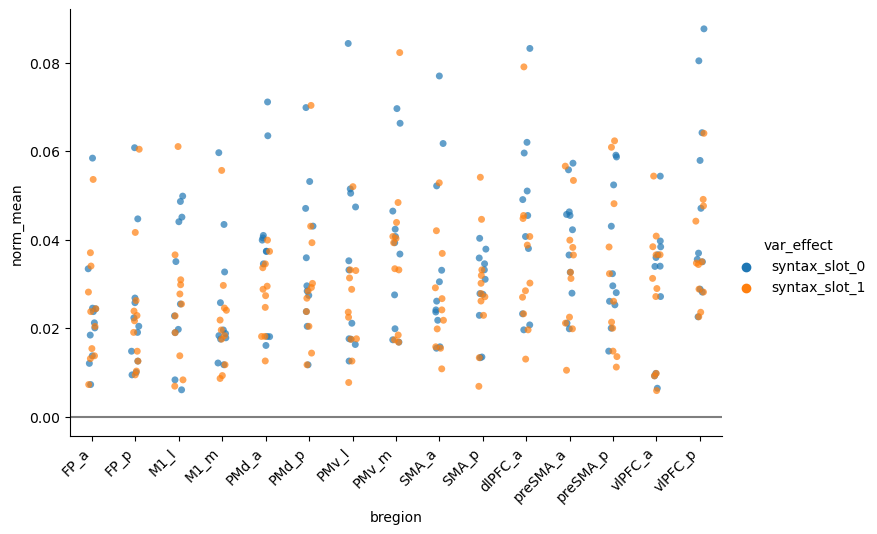

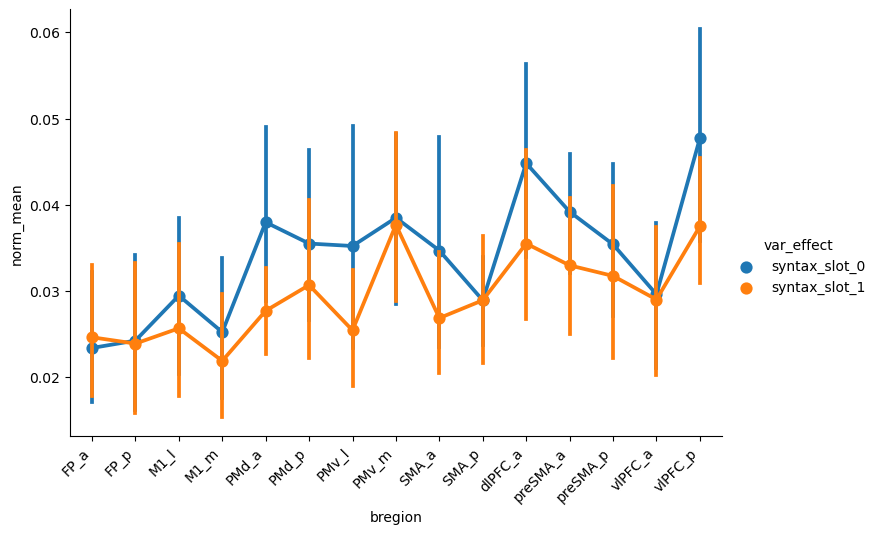

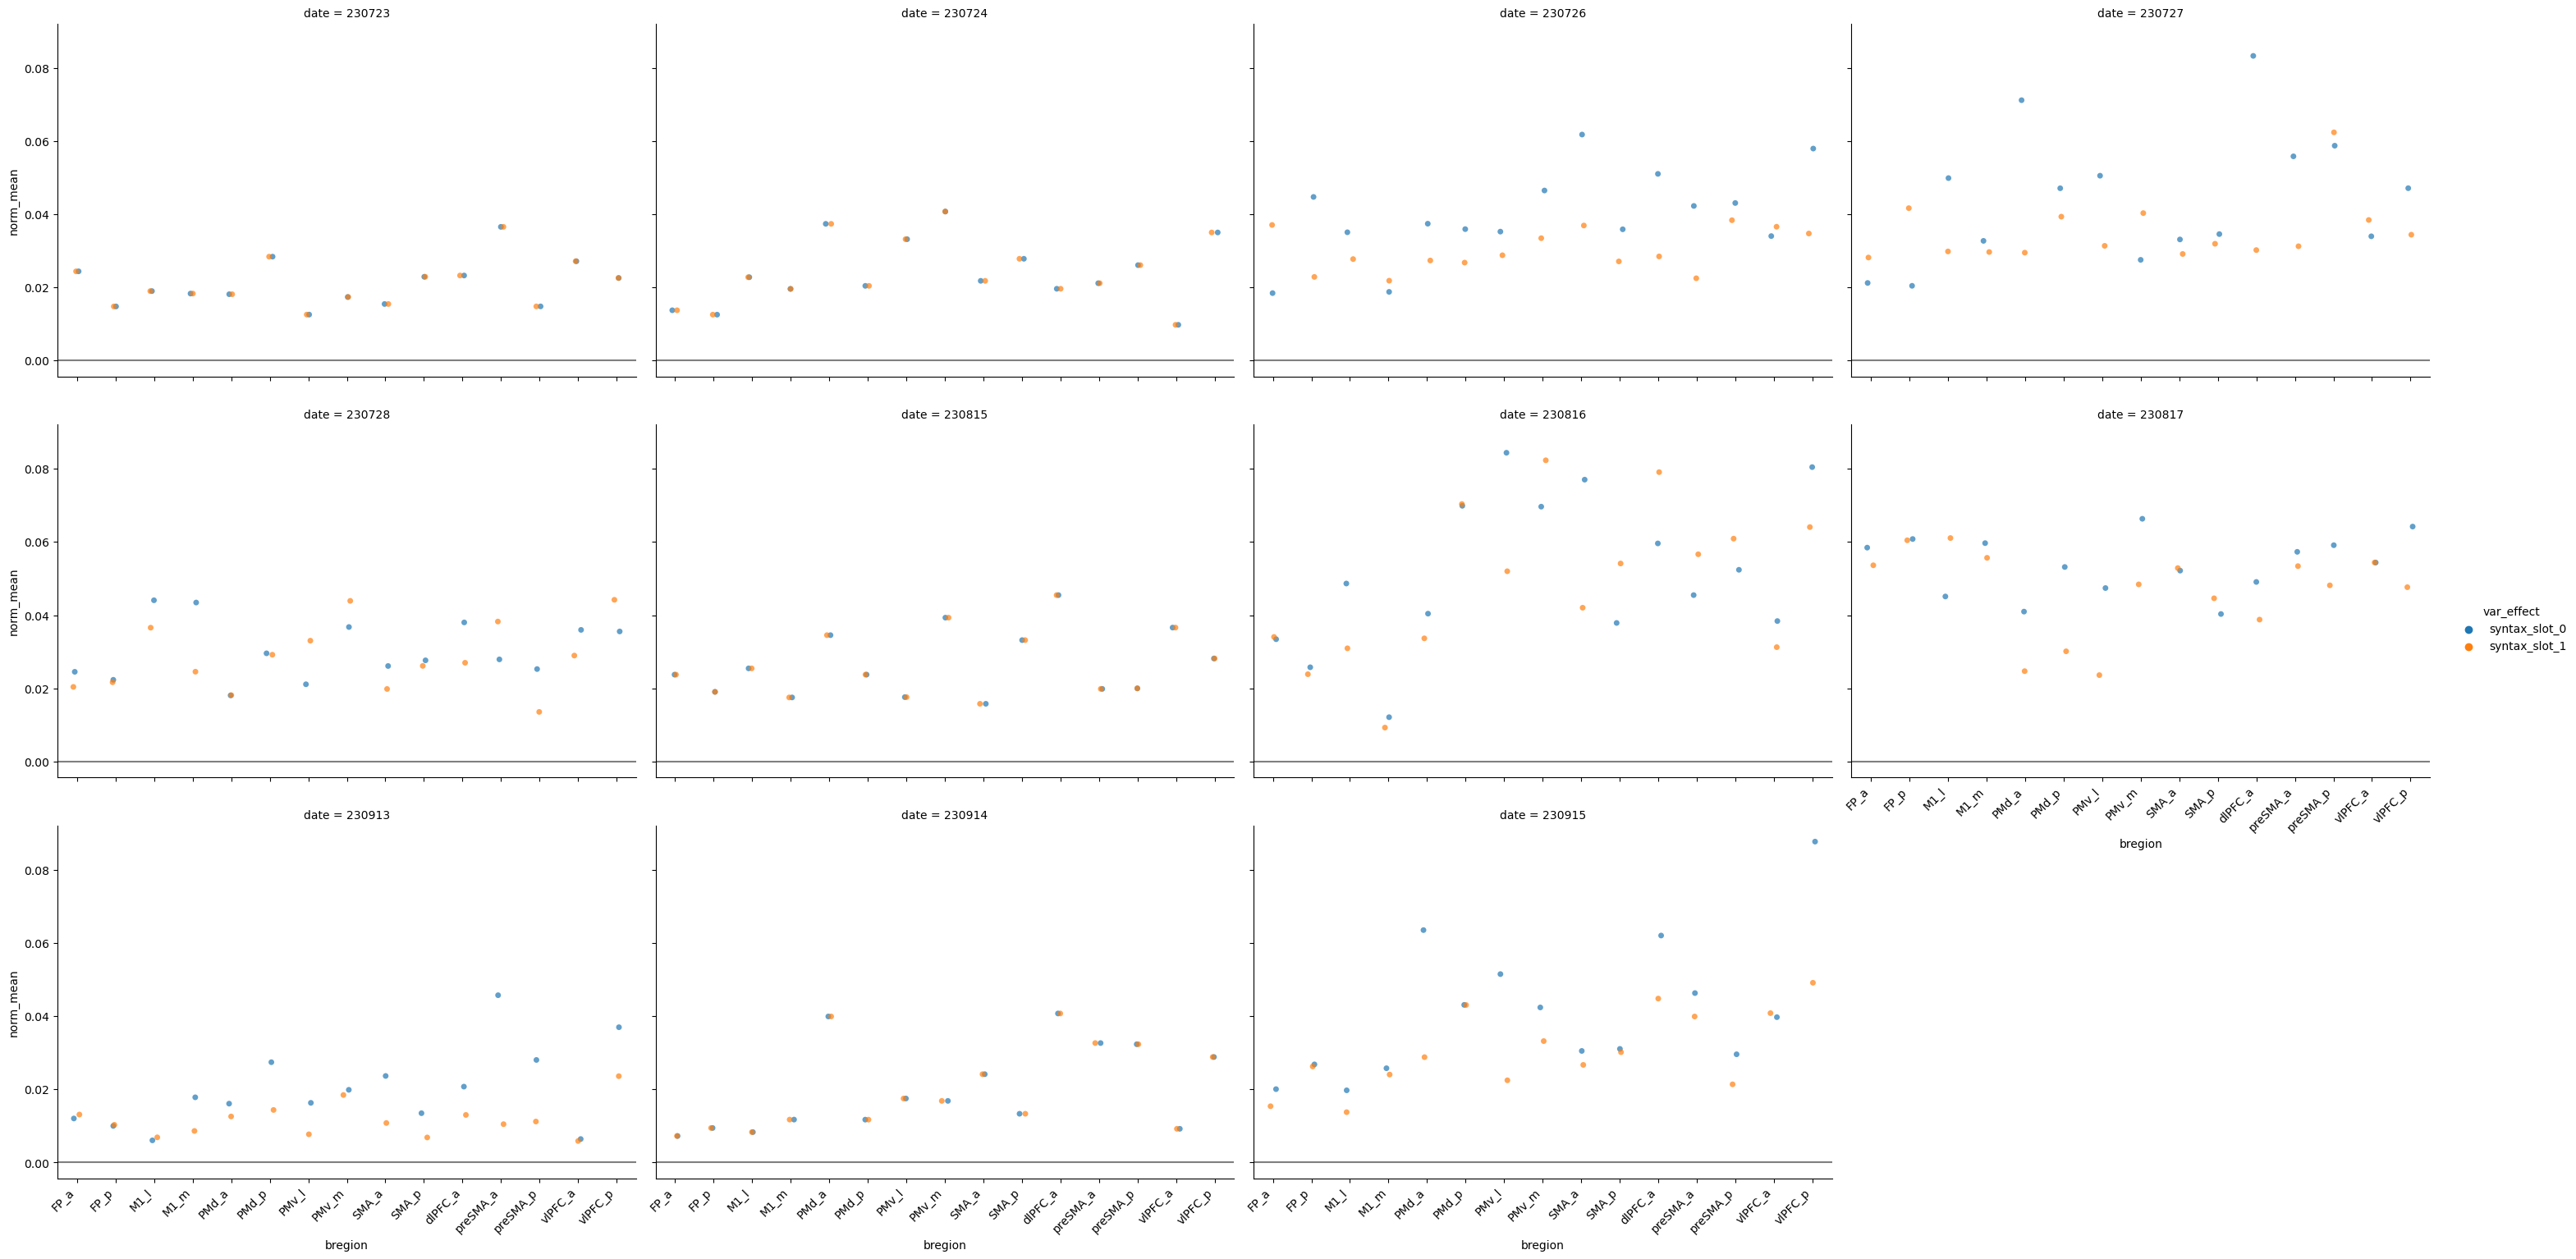

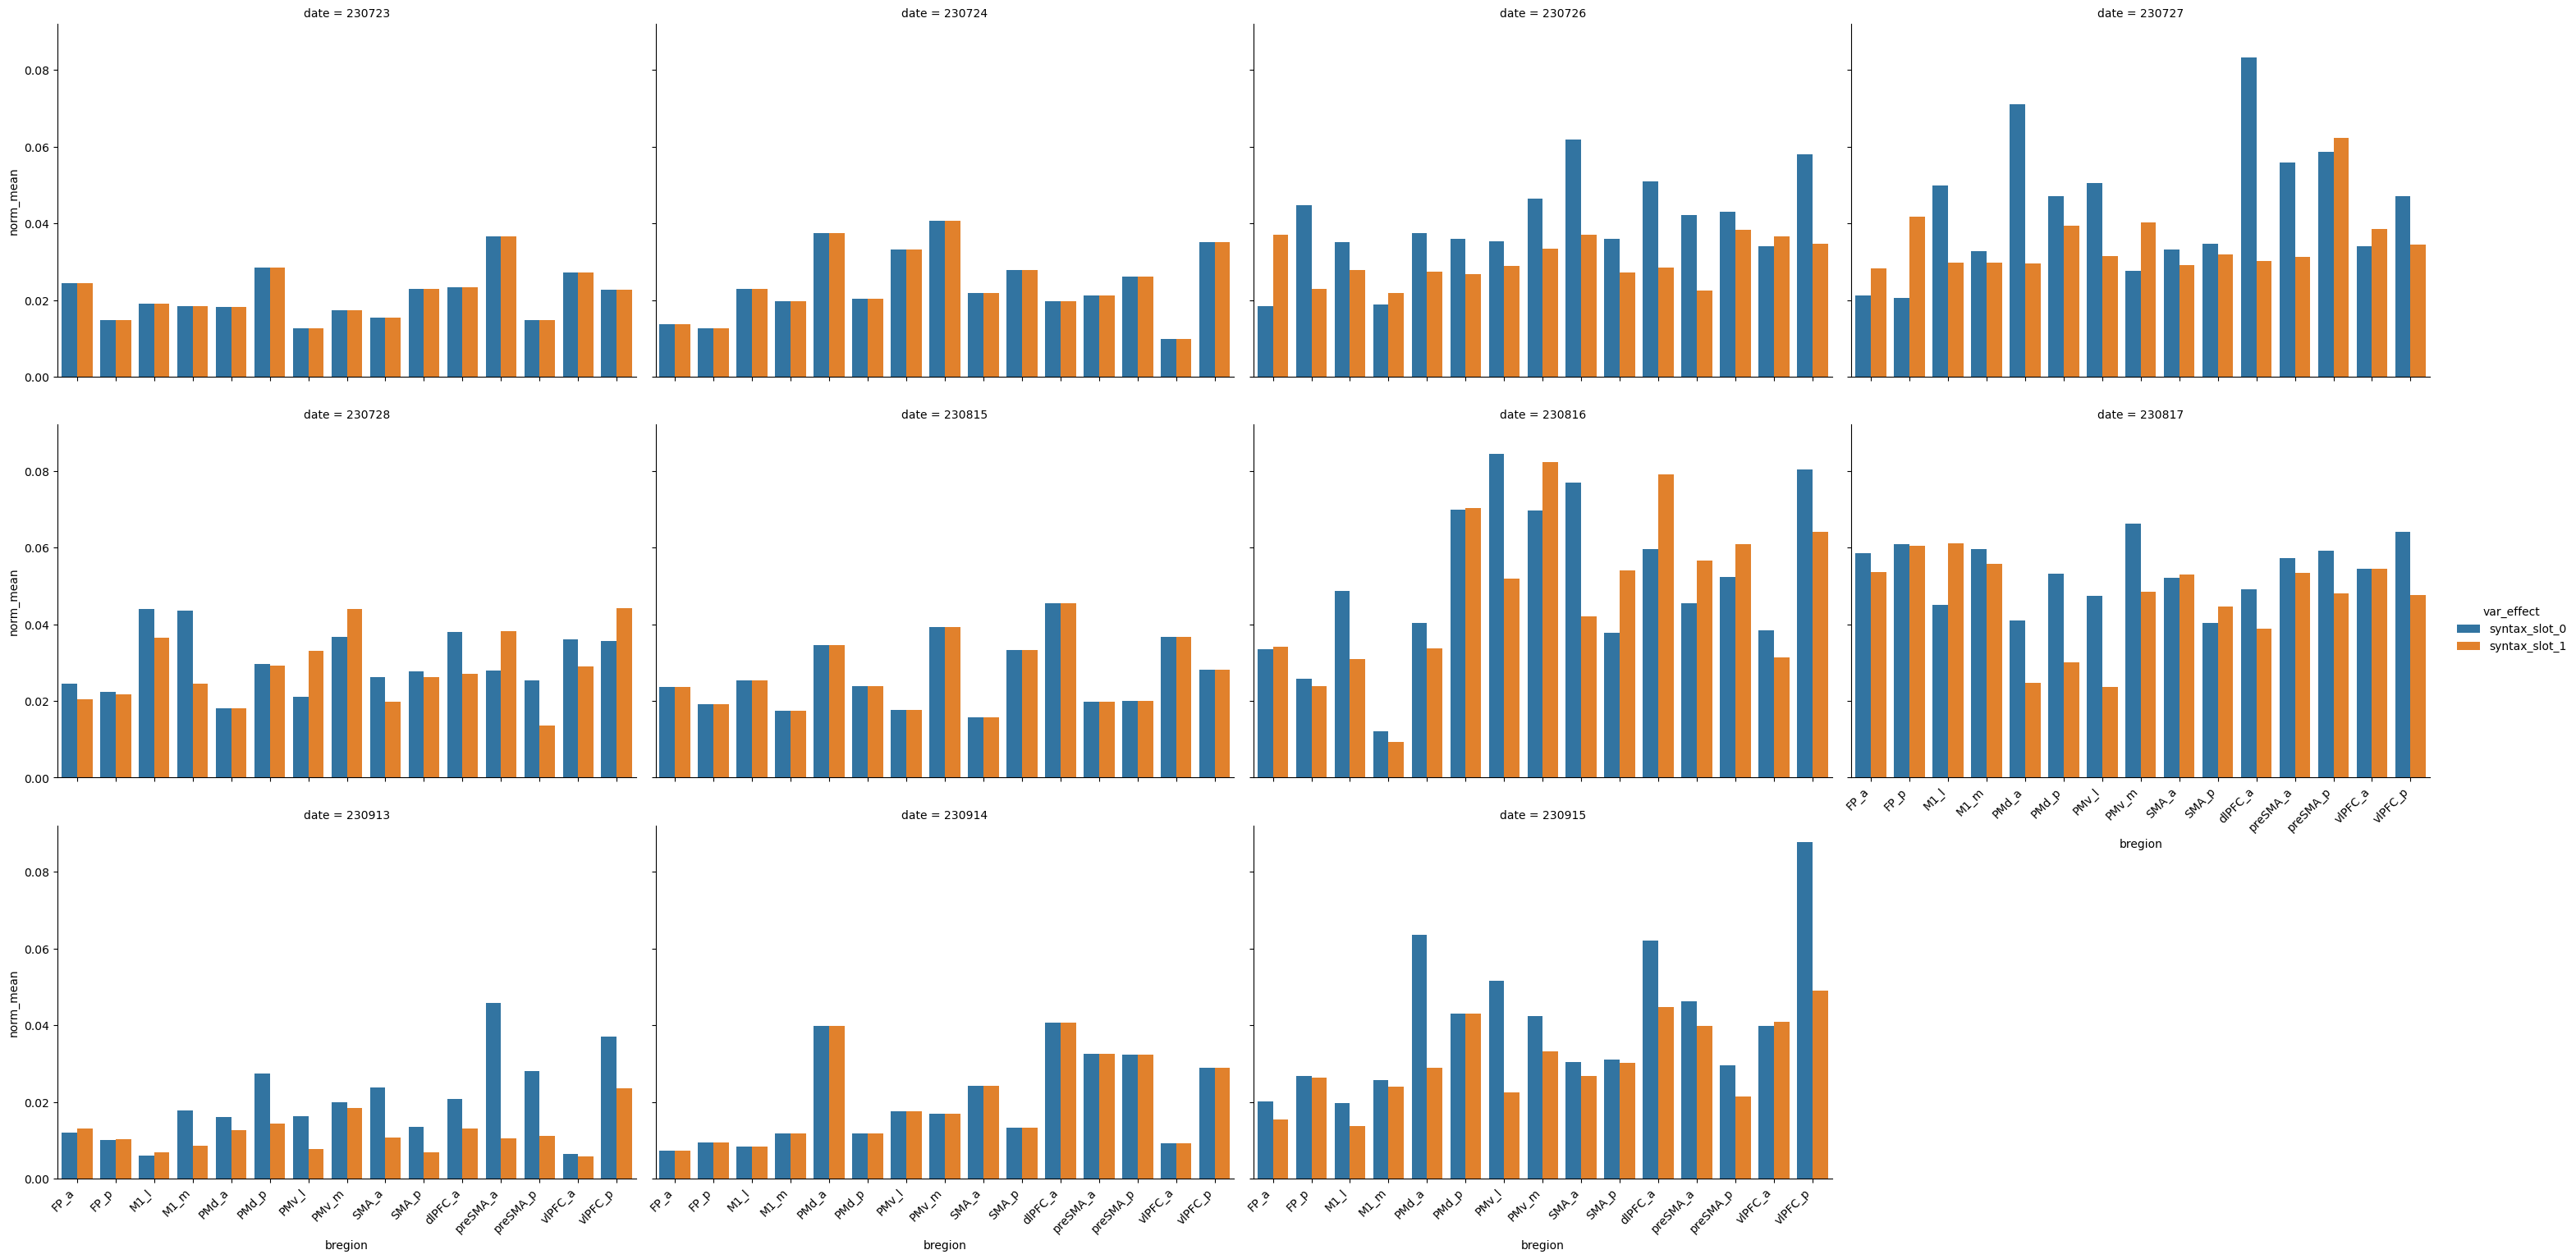

In [208]:
from pythonlib.tools.snstools import rotateLabel

fig = sns.catplot(data=DFANGLE_AGG, x="bregion", y="norm_mean", hue="var_effect", jitter=True, alpha=0.7, aspect=1.5)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/allvectors-catplot-1.pdf")

fig = sns.catplot(data=DFANGLE_AGG, x="bregion", y="norm_mean", hue="var_effect", kind="point", aspect=1.5)
rotateLabel(fig)
# savefig(fig, f"{SAVEDIR}/allvectors-catplot-2.pdf")
# plt.close("all")


fig = sns.catplot(data=DFANGLE_AGG, x="bregion", y="norm_mean", hue="var_effect", jitter=True, alpha=0.7, aspect=1.5, col="date", col_wrap=4)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/allvectors-catplot-1.pdf")

fig = sns.catplot(data=DFANGLE_AGG, x="bregion", y="norm_mean", hue="var_effect", kind="bar", aspect=1.5, col="date", col_wrap=4)
rotateLabel(fig)
# savefig(fig, f"{SAVEDIR}/allvectors-catplot-2.pdf")
# plt.close("all")


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


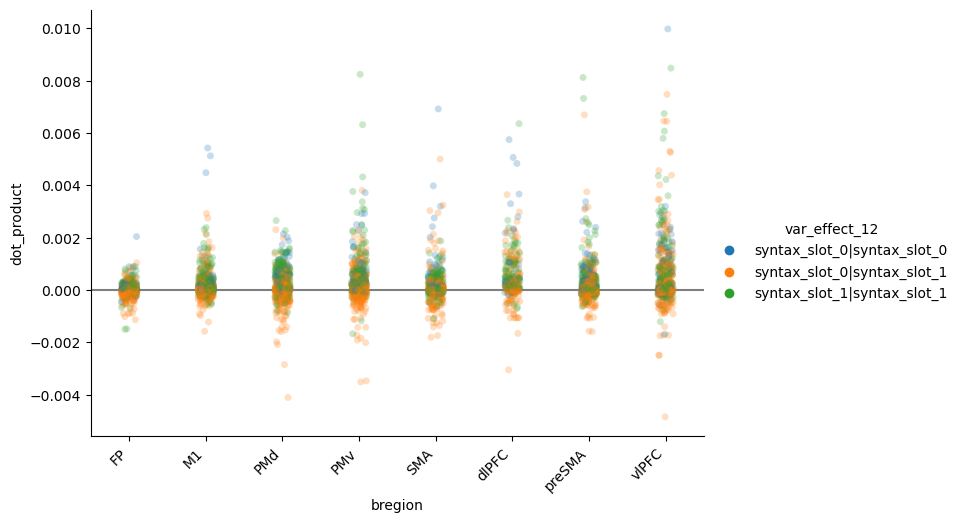

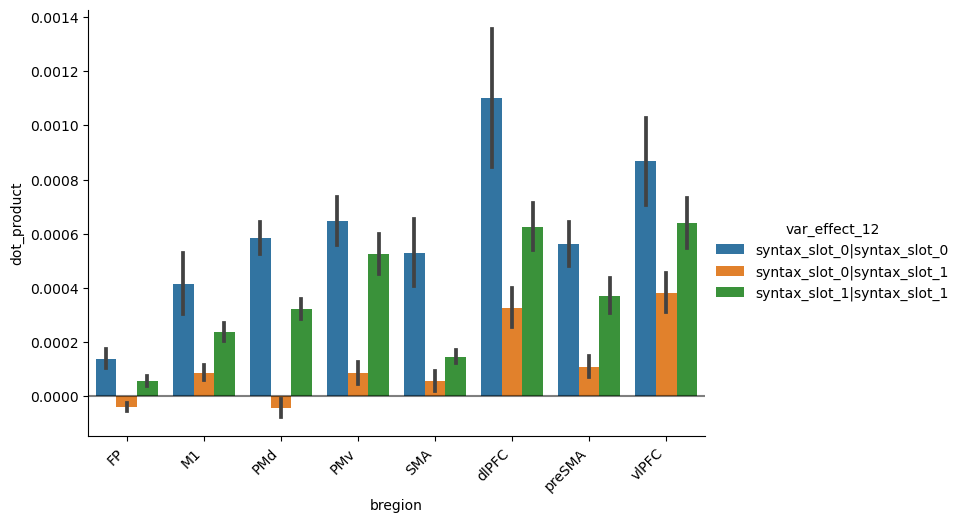

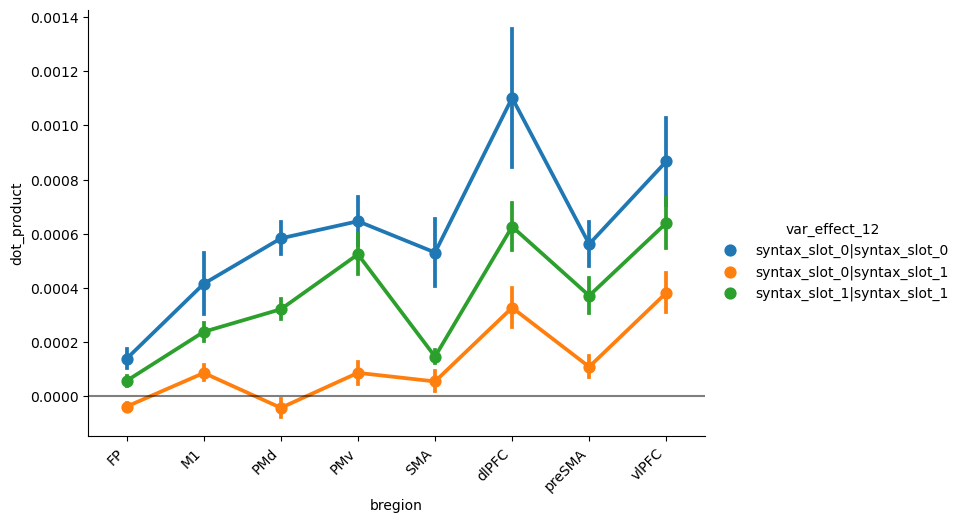

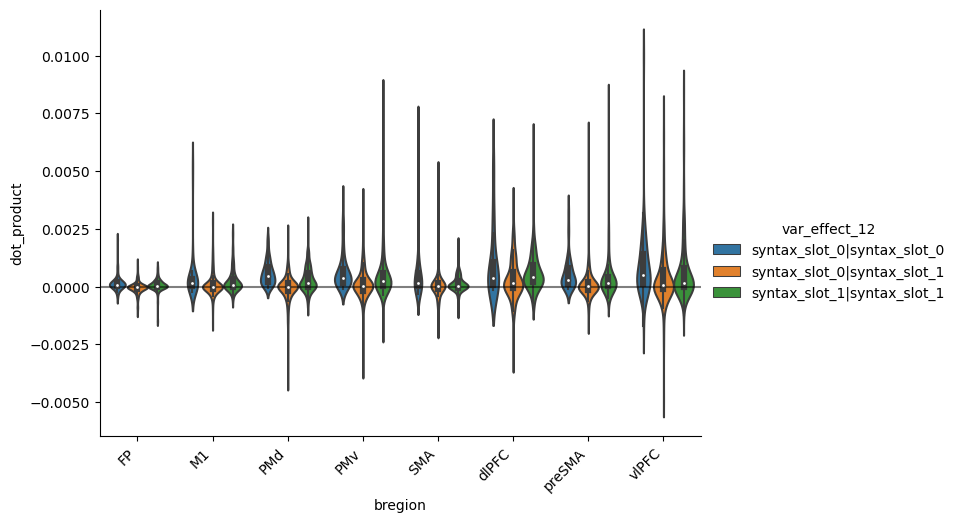

In [209]:
fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", jitter=True, 
                  alpha=0.25, aspect=1.5)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-1.pdf")

fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", kind="bar", aspect=1.5, errorbar="se")
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-2.pdf")

fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", kind="point", aspect=1.5, errorbar="se")
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-2.pdf")

fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", kind="violin", aspect=1.5)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-2.pdf")


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


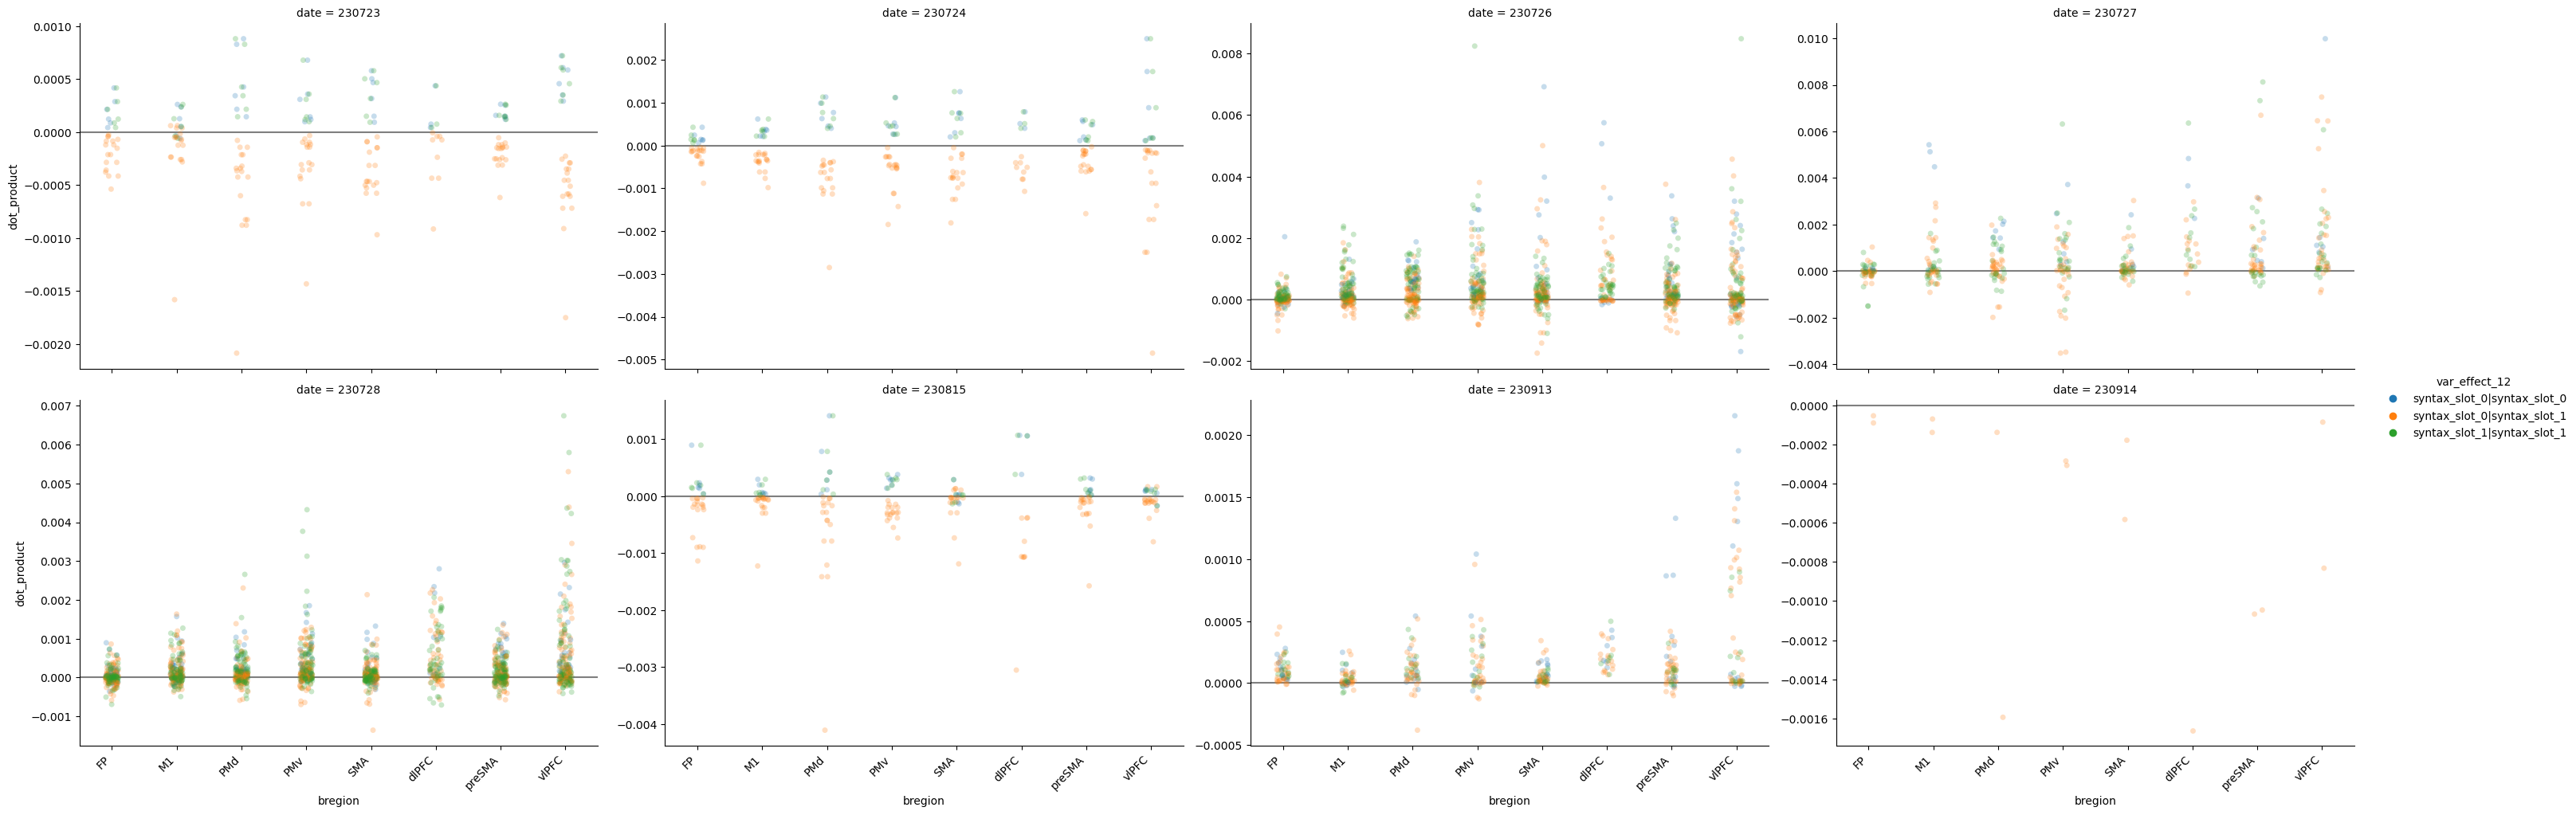

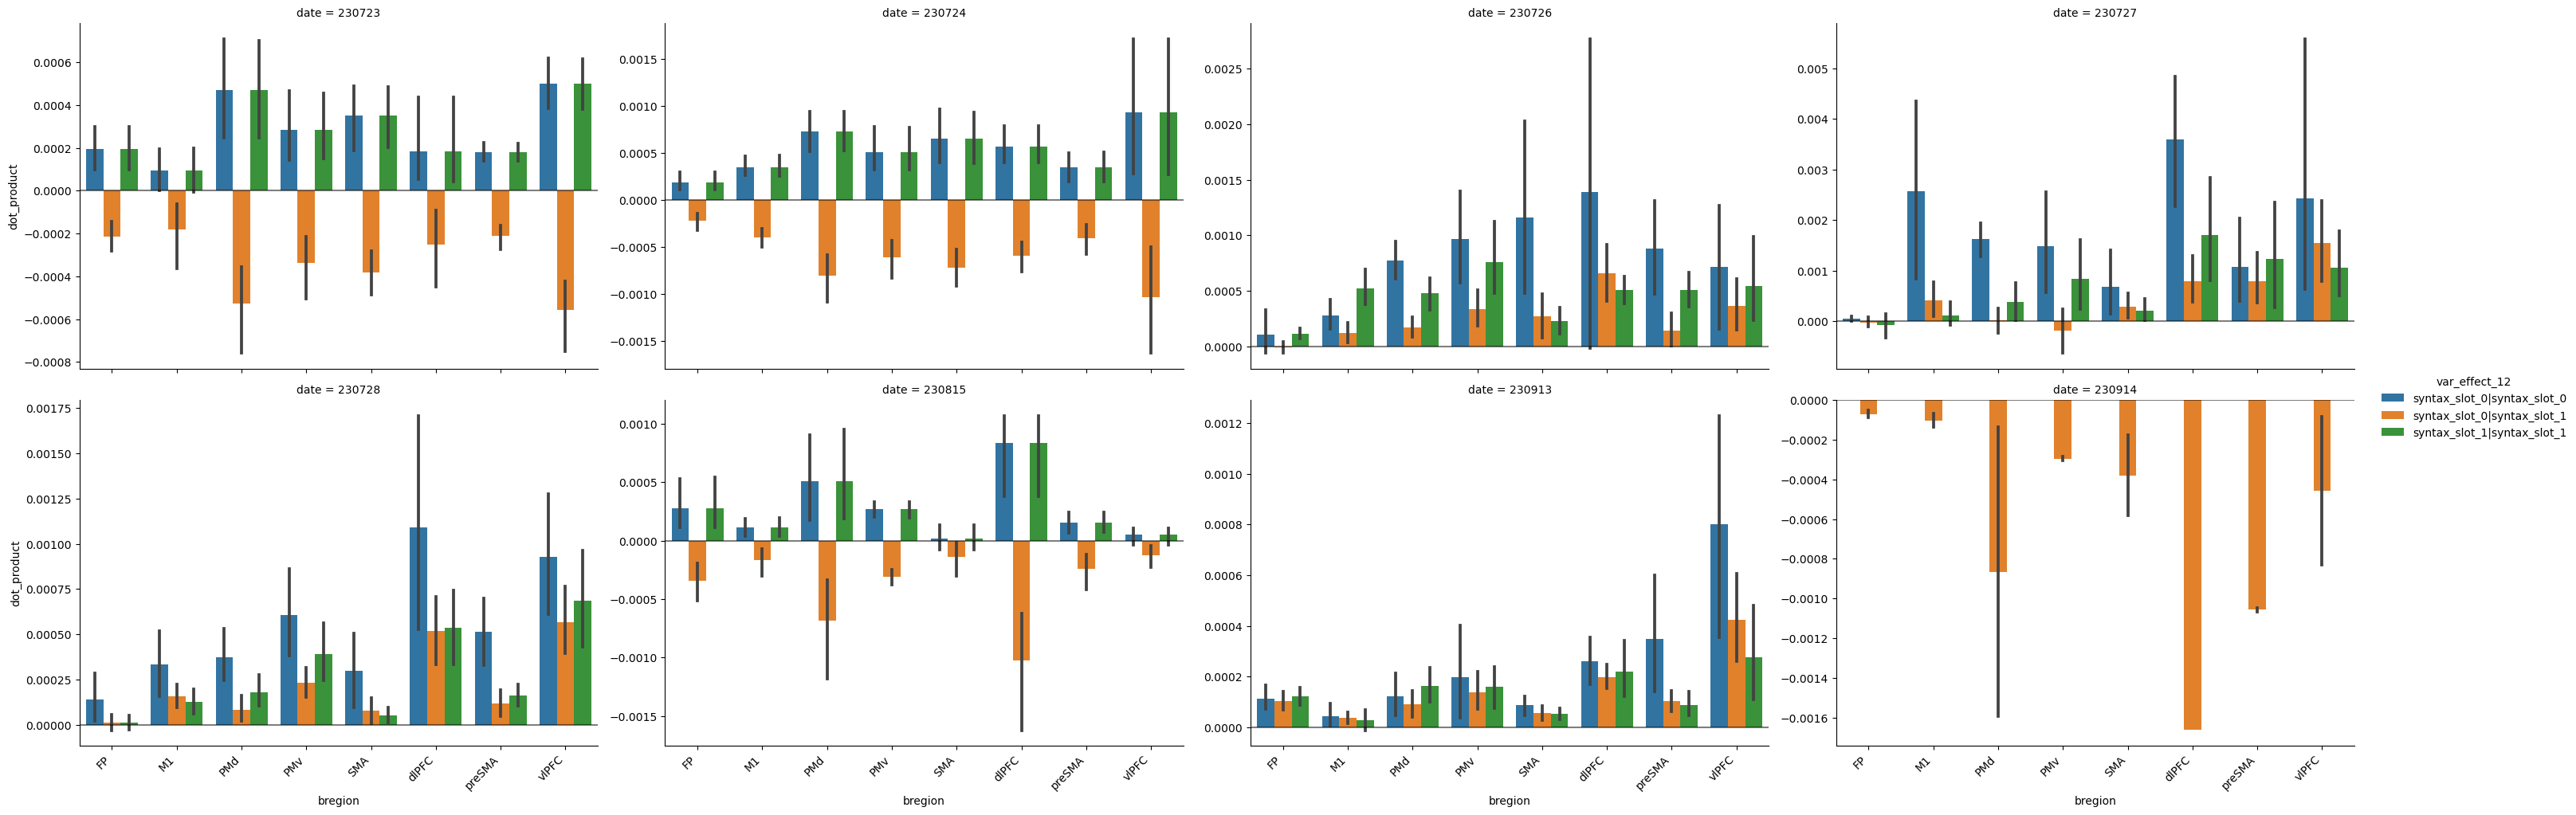

In [210]:
fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", jitter=True, 
                  alpha=0.25, aspect=1.5, col="date", col_wrap=4, sharey=False)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-1.pdf")

fig = sns.catplot(data=DF_DOT, x="bregion", y="dot_product", hue="var_effect_12", kind="bar", aspect=1.5,
                  col="date", col_wrap=4, sharey=False)
rotateLabel(fig)
for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
# savefig(fig, f"{SAVEDIR}/dot_across_ovar-catplot-2.pdf")


In [194]:
# Plot histograms 

In [173]:
animal

'Diego'